### Imports

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [54]:
import scipy.stats as stats

In [3]:
df1 = pd.read_csv('train.csv')

In [4]:
df1.shape

(103904, 25)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df2 = pd.read_csv('test.csv')

In [7]:
df2.shape

(25976, 25)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [9]:
df = pd.concat([df1, df2])

In [10]:
df.shape

(129880, 25)

In [11]:
df1.shape[0] + df2.shape[0]

129880

In [12]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [13]:
df.columns = df.columns.str.replace(' ', '_').str.replace('/','_').str.replace('-','_').str.lower()

In [14]:
df = df.drop(columns='unnamed:_0')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   class                              129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     12988

In [16]:
df.isnull().sum()

id                                     0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on_board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df = df.rename(columns={'class': 'customer_class'})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   gender                             129487 non-null  object 
 2   customer_type                      129487 non-null  object 
 3   age                                129487 non-null  int64  
 4   type_of_travel                     129487 non-null  object 
 5   customer_class                     129487 non-null  object 
 6   flight_distance                    129487 non-null  int64  
 7   inflight_wifi_service              129487 non-null  int64  
 8   departure_arrival_time_convenient  129487 non-null  int64  
 9   ease_of_online_booking             129487 non-null  int64  
 10  gate_location                      129487 non-null  int64  
 11  food_and_drink                     12948

### Add to wrangle file!

In [6]:
def get_airline_data(filename="airline.csv"):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - If csv doesn't exists:
        - create a df
        - write df to csv
    - Output airline passenger satisfaction df
    """
    if os.path.exists(filename):
        df = pd.read_csv(filename, index_col=0) 
        print('Found CSV!')
        return df
    
    else:
        df1 = pd.read_csv('train.csv')
        df2 = pd.read_csv('test.csv')
        df = pd.concat([df1, df2])
        df = df.reset_index(drop=True)
        df.columns = df.columns.str.replace(' ', '_').str.replace('/','_').str.replace('-','_').str.lower()
        df = df.drop(columns='unnamed:_0')
        df = df.rename(columns={'class': 'customer_class'})
        df = df.dropna()
        #want to save to csv
        df.to_csv(filename)
        print('Creating CSV!')
        return df

In [7]:
df = get_airline_data()

Creating CSV!


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   gender                             129487 non-null  object 
 2   customer_type                      129487 non-null  object 
 3   age                                129487 non-null  int64  
 4   type_of_travel                     129487 non-null  object 
 5   customer_class                     129487 non-null  object 
 6   flight_distance                    129487 non-null  int64  
 7   inflight_wifi_service              129487 non-null  int64  
 8   departure_arrival_time_convenient  129487 non-null  int64  
 9   ease_of_online_booking             129487 non-null  int64  
 10  gate_location                      129487 non-null  int64  
 11  food_and_drink                     1294

In [26]:
df.head().T

,0,1,2,3,4
id,70172,5047,110028,24026,119299
gender,Male,Male,Female,Female,Male
customer_type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
age,13,25,26,25,61
type_of_travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
customer_class,Eco Plus,Business,Business,Business,Business
flight_distance,460,235,1142,562,214
inflight_wifi_service,3,3,2,2,3
departure_arrival_time_convenient,4,2,2,5,3
ease_of_online_booking,3,3,2,5,3


In [27]:
df.customer_type.value_counts()

Loyal Customer       105773
disloyal Customer     23714
Name: customer_type, dtype: int64

In [29]:
df['customer_class'].value_counts()

Business    61990
Eco         58117
Eco Plus     9380
Name: customer_class, dtype: int64

In [30]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return object_cols



def get_numeric_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return num_cols

In [31]:
def nulls_by_col(df):
    """
    This function will:
        - take in a dataframe
        - assign a variable to a Series of total row nulls for ea/column
        - assign a variable to find the percent of rows w/nulls
        - output a df of the two variables.
    """
    num_missing = df.isnull().sum()
    pct_miss = (num_missing / df.shape[0]) * 100
    cols_missing = pd.DataFrame({
                    'num_rows_missing': num_missing,
                    'percent_rows_missing': pct_miss
                    })
    
    return  cols_missing

In [32]:
def nulls_by_row(df, index_id = 'id'):
    """
    """
    num_missing = df.isnull().sum(axis=1)
    pct_miss = (num_missing / df.shape[1]) * 100
    
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': pct_miss})

    rows_missing = df.merge(rows_missing,
                        left_index=True,
                        right_index=True).reset_index()[[index_id, 'num_cols_missing', 'percent_cols_missing']]
    
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

In [33]:
def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # .value_counts()
    # observation of nulls in the dataframe
    # distribution of numerical attributes
    '''
    print(f"""SUMMARY REPORT
=====================================================
          
          
Dataframe head: 
{df.head(3)}
          
=====================================================
          
          
Dataframe info: """)
    df.info()

    print(f"""=====================================================
          
          
Dataframe Description: 
{df.describe().T}
          
=====================================================


nulls in dataframe by column: 
{nulls_by_col(df)}
=====================================================


nulls in dataframe by row: 
{nulls_by_row(df)}
=====================================================
    
    
DataFrame value counts: 
 """)         
    for col in (get_object_cols(df)): 
        print(f"""******** {col.upper()} - Value Counts:
{df[col].value_counts()}
    _______________________________________""")                   
        
    num_cols = len(get_numeric_cols(df))
    num_rows, num_cols_subplot = divmod(num_cols, 3)
    if num_cols_subplot > 0:
        num_rows += 1
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
    
    for i, col in enumerate(get_numeric_cols(df)):
        row_idx, col_idx = divmod(i, 3)
        sns.histplot(df[col], ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()

SUMMARY REPORT
          
          
Dataframe head: 
       id  gender      customer_type  age   type_of_travel customer_class  \
0   70172    Male     Loyal Customer   13  Personal Travel       Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel       Business   
2  110028  Female     Loyal Customer   26  Business travel       Business   

   flight_distance  inflight_wifi_service  departure_arrival_time_convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   

   ease_of_online_booking  ...  inflight_entertainment  on_board_service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   

   leg_room

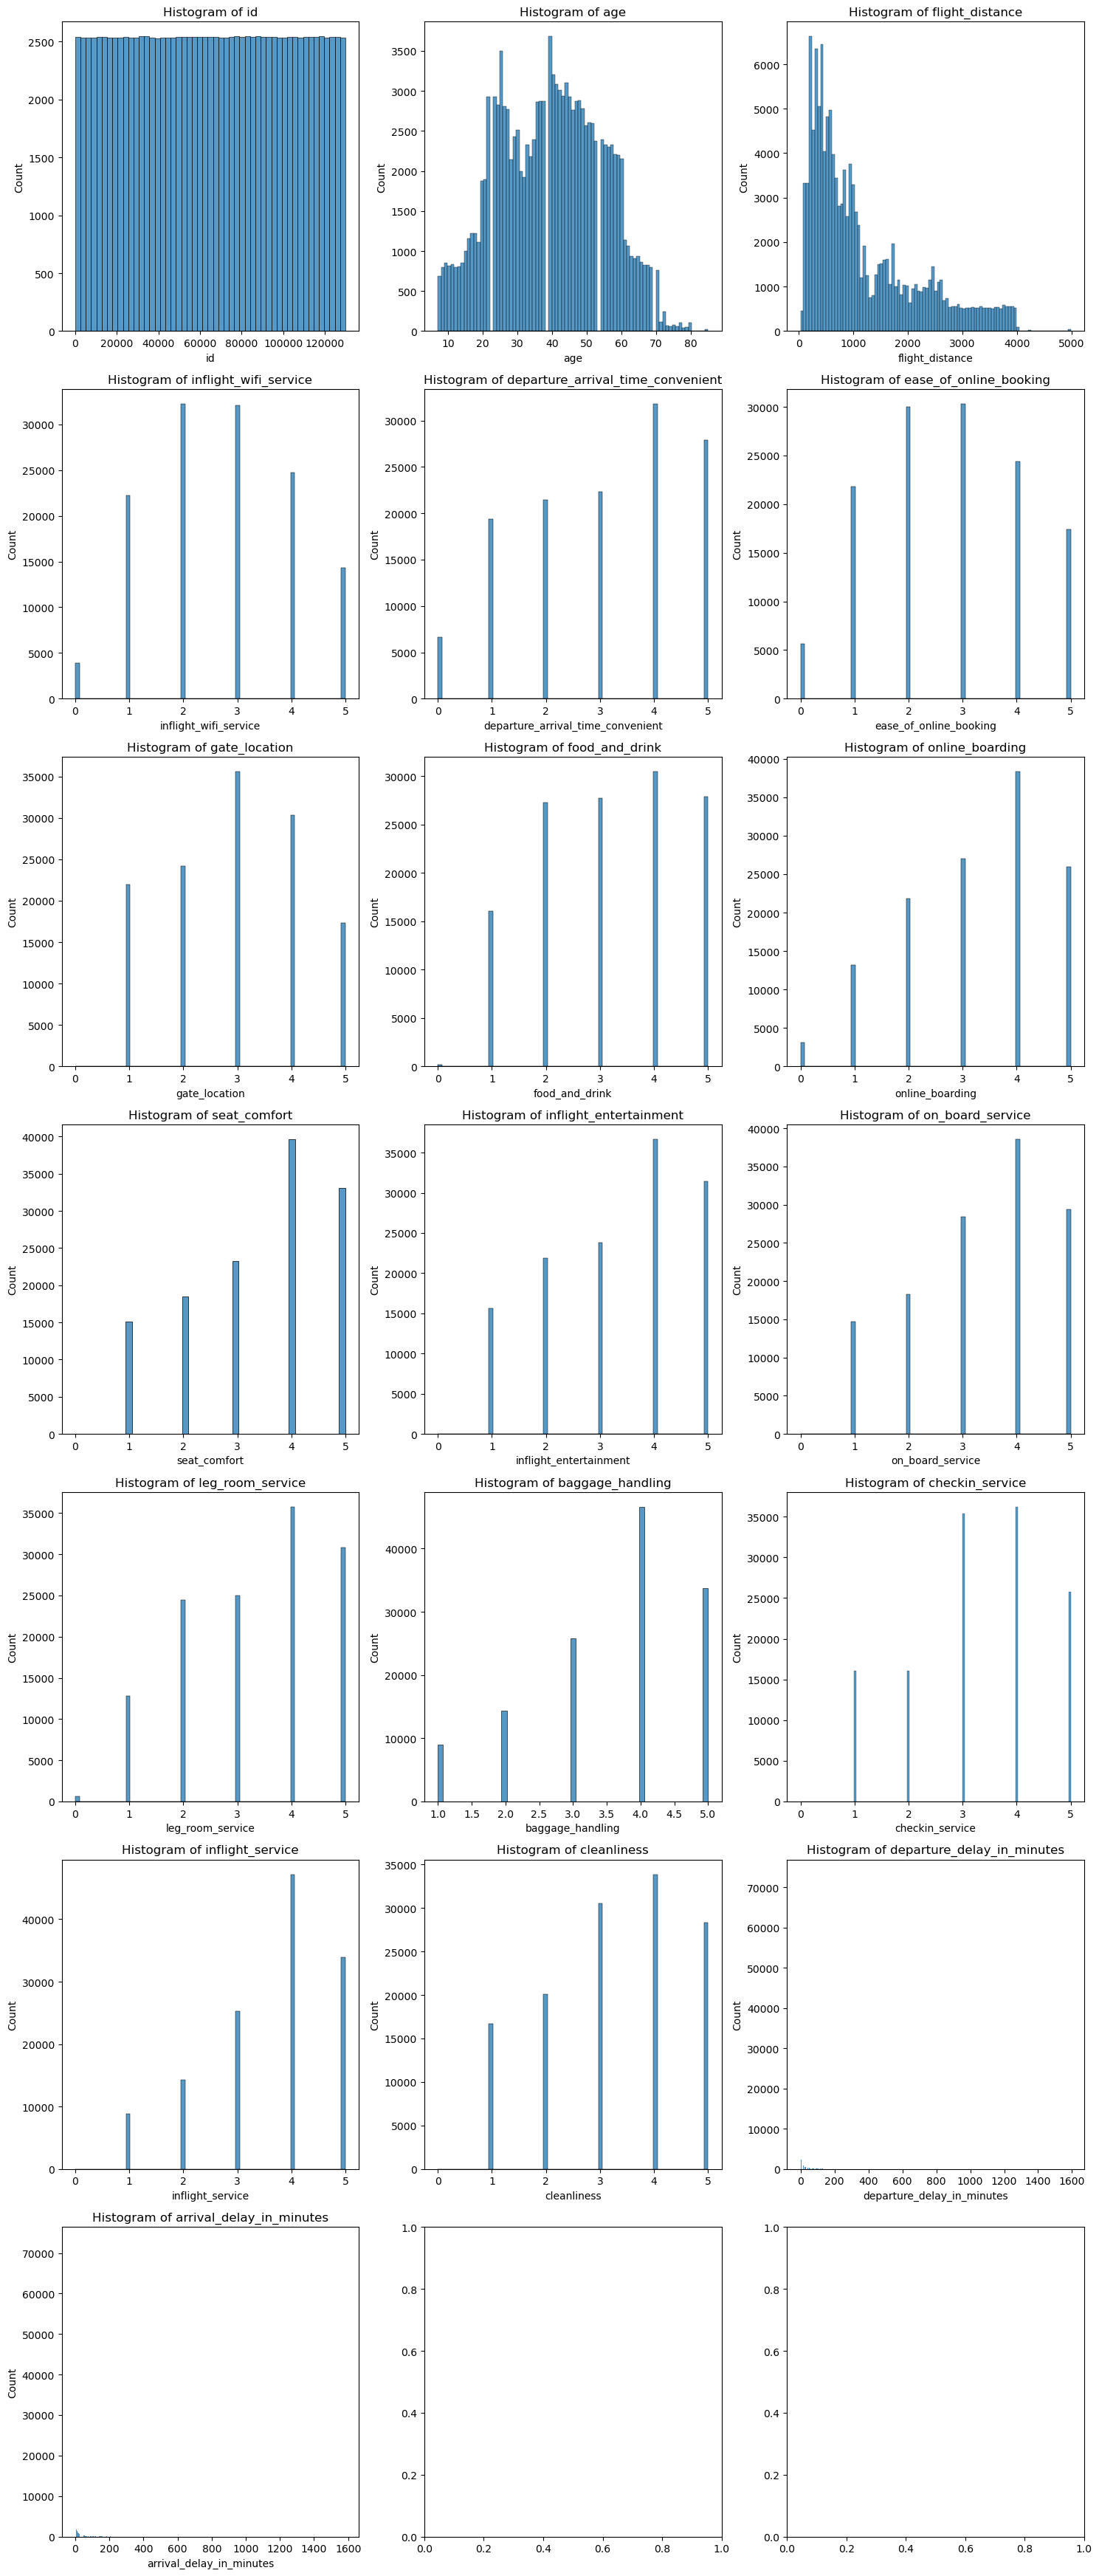

In [34]:
summarize(df)

In [35]:
df.head().T

,0,1,2,3,4
id,70172,5047,110028,24026,119299
gender,Male,Male,Female,Female,Male
customer_type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
age,13,25,26,25,61
type_of_travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
customer_class,Eco Plus,Business,Business,Business,Business
flight_distance,460,235,1142,562,214
inflight_wifi_service,3,3,2,2,3
departure_arrival_time_convenient,4,2,2,5,3
ease_of_online_booking,3,3,2,5,3


### Create Dummy columns

In [9]:
#TELCO

def prep_airline(df):
    '''
    This function will pepare airline dataset for modeling
    '''
    
    dummy_airline = pd.get_dummies(df[['gender', 'customer_type', 'type_of_travel', 
                      'customer_class']], drop_first=True)
    df = pd.concat([df, dummy_airline], axis=1)
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    return df

In [10]:
df = prep_airline(df)

In [40]:
df.head().T

,0,1,2,3,4
id,70172,5047,110028,24026,119299
gender,Male,Male,Female,Female,Male
customer_type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
age,13,25,26,25,61
type_of_travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
customer_class,Eco Plus,Business,Business,Business,Business
flight_distance,460,235,1142,562,214
inflight_wifi_service,3,3,2,2,3
departure_arrival_time_convenient,4,2,2,5,3
ease_of_online_booking,3,3,2,5,3


### Split data into train, validate, test

In [11]:
#SPLIT FUNCTION

def split_function(df, target_variable):
    '''
    Take in a data frame and returns train, validate, test subset data frames
    Input target_variable as a string
    '''
    train, test = train_test_split(df,
                              test_size=0.20,
                              random_state=123,
                              stratify= df[target_variable]
                                  )
    train, validate = train_test_split(train,
                                  test_size=.25,
                                  random_state=123,
                                   stratify= train[target_variable]
                                      )
    return train, validate, test

In [12]:
train, validate, test = split_function(df, 'satisfaction')

In [13]:
print(f'   og_df: ',df.shape)
print(f'   Train: ',train.shape)
print(f'Validate: ', validate.shape)
print(f'    Test: ',test.shape)

   og_df:  (129487, 29)
   Train:  (77691, 29)
Validate:  (25898, 29)
    Test:  (25898, 29)


## Exploration

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77691 entries, 76891 to 34569
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 77691 non-null  int64  
 1   gender                             77691 non-null  object 
 2   customer_type                      77691 non-null  object 
 3   age                                77691 non-null  int64  
 4   type_of_travel                     77691 non-null  object 
 5   customer_class                     77691 non-null  object 
 6   flight_distance                    77691 non-null  int64  
 7   inflight_wifi_service              77691 non-null  int64  
 8   departure_arrival_time_convenient  77691 non-null  int64  
 9   ease_of_online_booking             77691 non-null  int64  
 10  gate_location                      77691 non-null  int64  
 11  food_and_drink                     77691 non-null 

In [56]:
df.head().T

,0,1,2,3,4
id,70172,5047,110028,24026,119299
gender,Male,Male,Female,Female,Male
customer_type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
age,13,25,26,25,61
type_of_travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
customer_class,Eco Plus,Business,Business,Business,Business
flight_distance,460,235,1142,562,214
inflight_wifi_service,3,3,2,2,3
departure_arrival_time_convenient,4,2,2,5,3
ease_of_online_booking,3,3,2,5,3


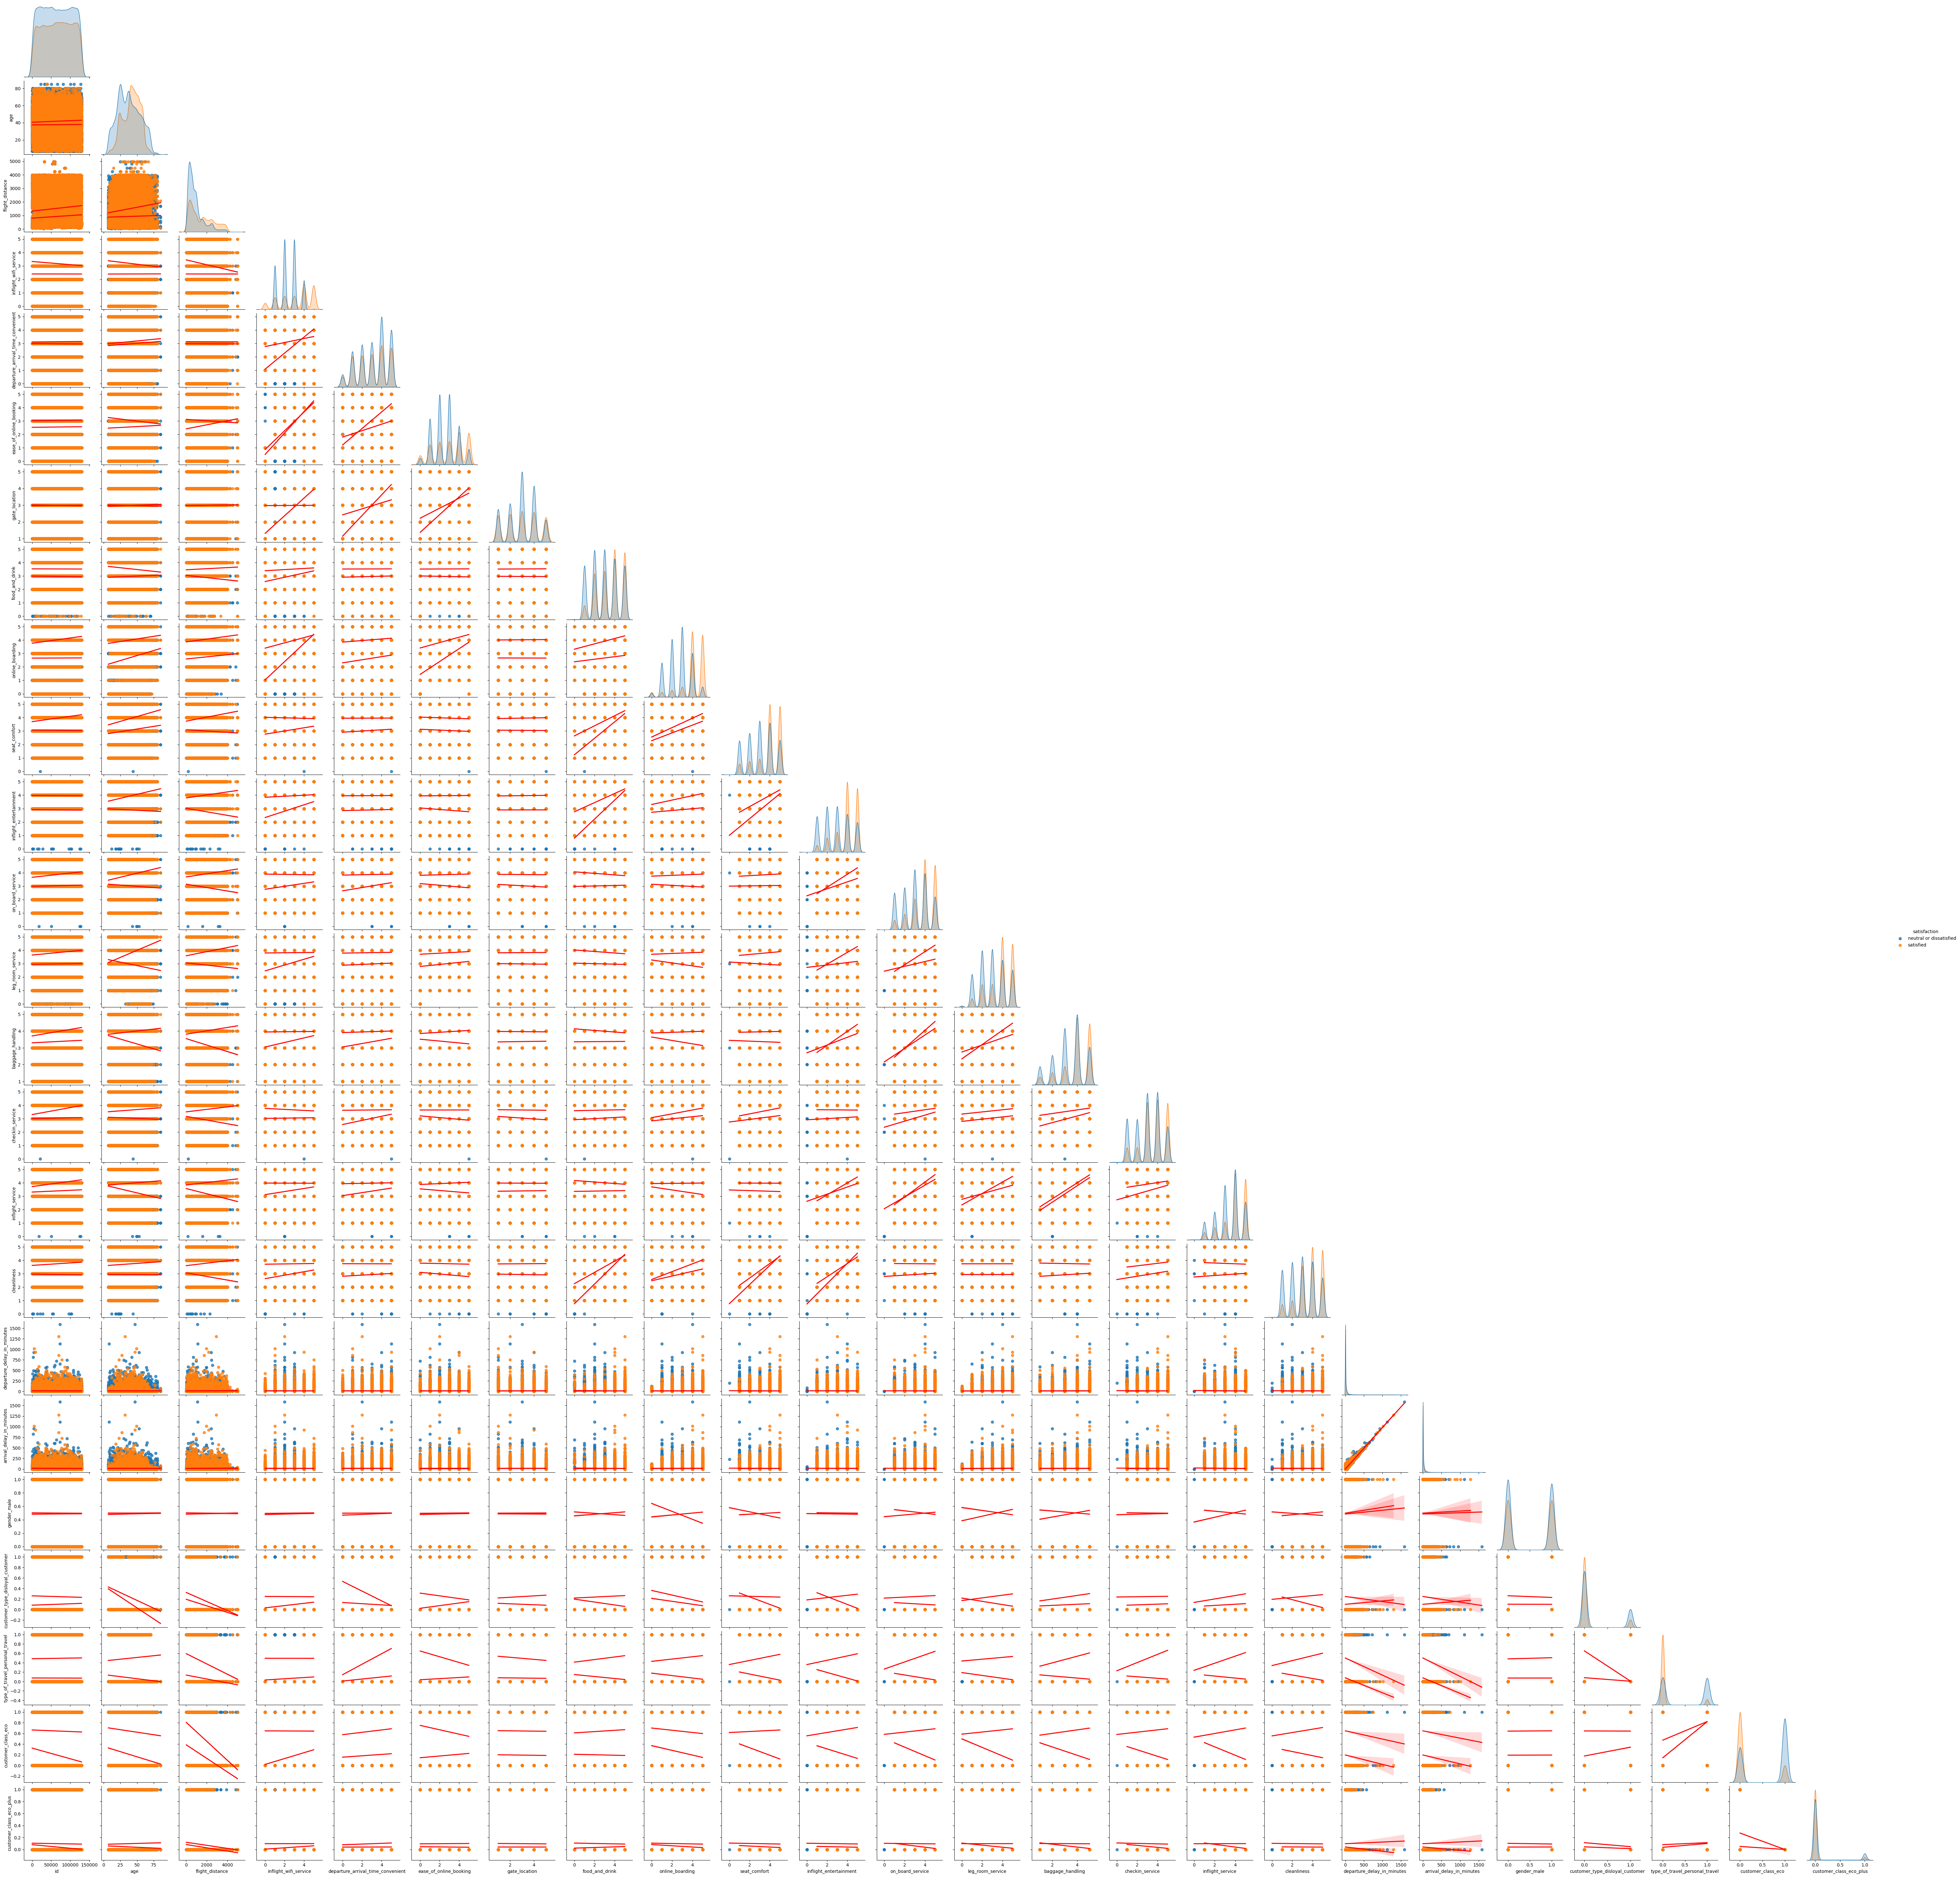

In [15]:
sns.pairplot(data=train, kind='reg', hue="satisfaction", plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()

In [16]:
train.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [46]:
train.head()

,id,gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,gender_male,customer_type_disloyal_customer,type_of_travel_personal_travel,customer_class_eco,customer_class_eco_plus
76891,43285,Male,disloyal Customer,45,Business travel,Business,347,1,1,1,...,1,2,0,0.0,neutral or dissatisfied,1,1,0,0,0
89549,3307,Female,disloyal Customer,22,Business travel,Business,240,5,4,5,...,4,4,6,11.0,satisfied,0,1,0,0,0
78018,112553,Male,disloyal Customer,29,Business travel,Eco Plus,853,2,2,2,...,3,5,36,40.0,neutral or dissatisfied,1,1,0,0,1
8382,24939,Female,Loyal Customer,22,Business travel,Eco Plus,2106,5,1,1,...,5,5,4,0.0,satisfied,0,0,0,0,1
2820,26315,Female,Loyal Customer,41,Personal Travel,Eco,2139,1,4,1,...,5,3,0,9.0,neutral or dissatisfied,0,0,1,1,0


<AxesSubplot:xlabel='satisfaction', ylabel='flight_distance'>

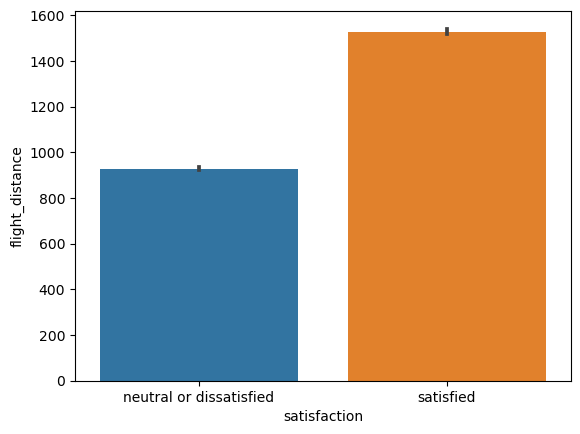

In [47]:
sns.barplot(data=train, x='satisfaction', y='flight_distance')

<AxesSubplot:xlabel='type_of_travel', ylabel='flight_distance'>

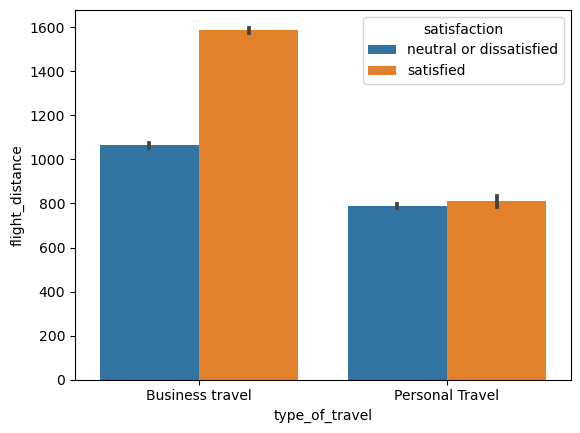

In [79]:
sns.barplot(data=train, x='type_of_travel', y='flight_distance', hue='satisfaction')

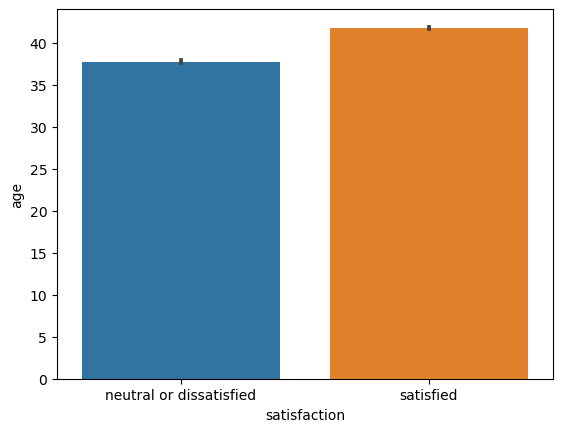

In [28]:
sns.barplot(data=train, x='satisfaction', y='age')
plt.show()

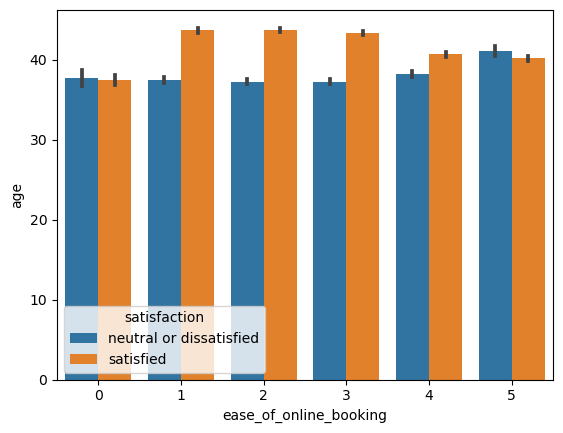

In [36]:
sns.barplot(data=train, x='ease_of_online_booking', y='age', hue='satisfaction')
plt.show()

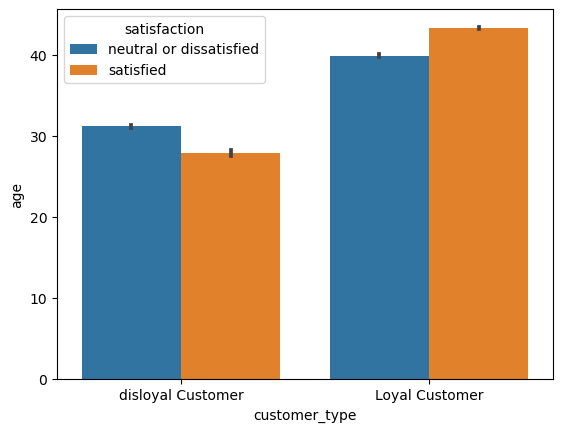

In [40]:
sns.barplot(data=train, x='customer_type', y='age', hue='satisfaction')
plt.show()

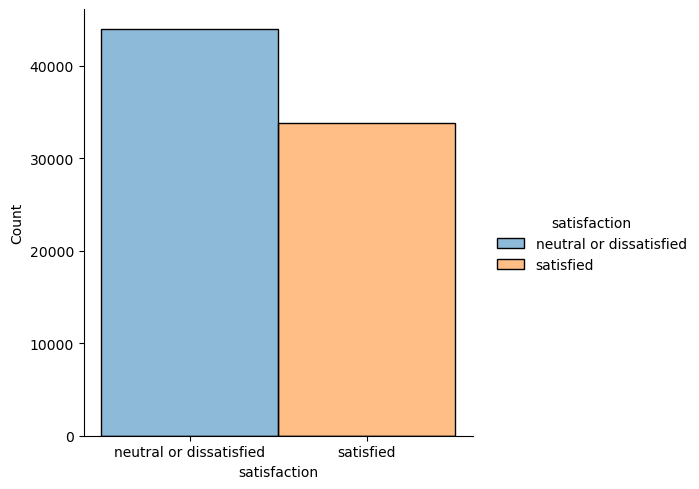

In [42]:
sns.displot(data=train, x='satisfaction', hue='satisfaction')
plt.show()

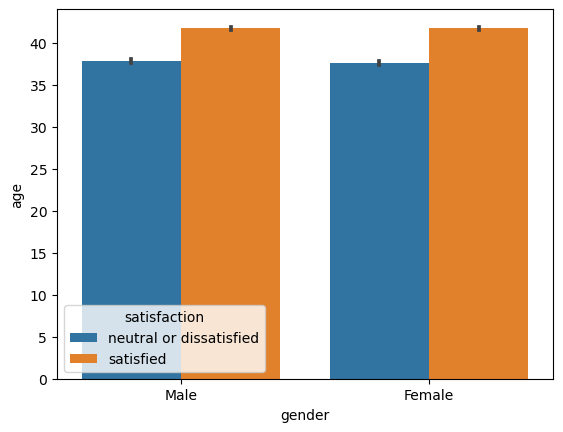

In [50]:
sns.barplot(data=train, x='gender', y='age', hue='satisfaction')
plt.show()

In [46]:
happy = train[train.satisfaction == 'satisfied']

In [47]:
not_happy = train[train.satisfaction == 'neutral or dissatisfied']

In [58]:
alpha = 0.05

$H_0$: Passenger satisfaction is independent of gender  
$H_0$: Passenger satisfaction is dependent on gender

In [52]:
observed = pd.crosstab(train.gender, train.satisfaction)
observed

satisfaction,neutral or dissatisfied,satisfied
gender,,
Female,22615,16911
Male,21320,16845


In [55]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [56]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed dataframe'
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by a new line
print('---\nExpected Values\n')

# print the expected values
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits
print(f'chi^2 = {chi2:.4f}')

# print the p-value, formatted to a float with 4 digits
print(f'p.    = {p:.4f}')

Observed Values

[[22615 16911]
 [21320 16845]]
---
Expected Values

[[22352 17173]
 [21582 16582]]
---

chi^2 = 14.4069
p.    = 0.0001


In [62]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis
